In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [9]:
data=pd.read_csv('income.csv')

In [10]:
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [11]:
data.shape

(22, 3)

Text(0, 0.5, 'income')

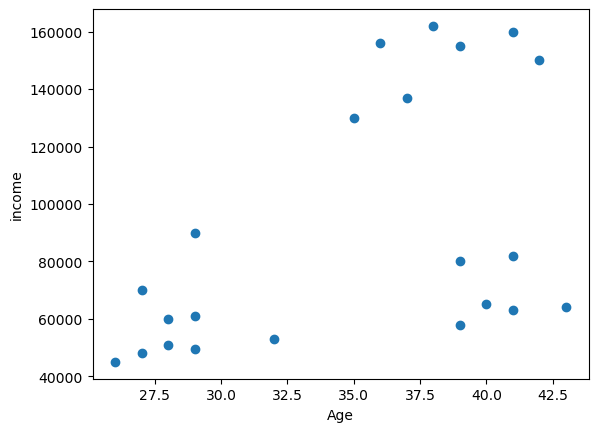

In [12]:
plt.scatter(data["Age"],data["Income($)"])
plt.xlabel("Age")
plt.ylabel("income")

In [13]:
sse=[]
for k in range(2,len(data)):
    km=KMeans(n_clusters=k)
    km.fit(data[["Age","Income($)"]])
    sse.append(km.inertia_)
sse

C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[3318233941.1619043,
 1577046058.8831167,
 814746044.2545456,
 296500418.0952381,
 231967084.4619048,
 174800337.7,
 119633613.78333332,
 96300255.03333335,
 68133457.7,
 42000112.333333336,
 21833432.166666664,
 14291766.333333334,
 10125026.166666668,
 8125016.666666667,
 6125012.166666667,
 4125010.166666667,
 2625007.5,
 1500007.0,
 1000002.5,
 500000.5]

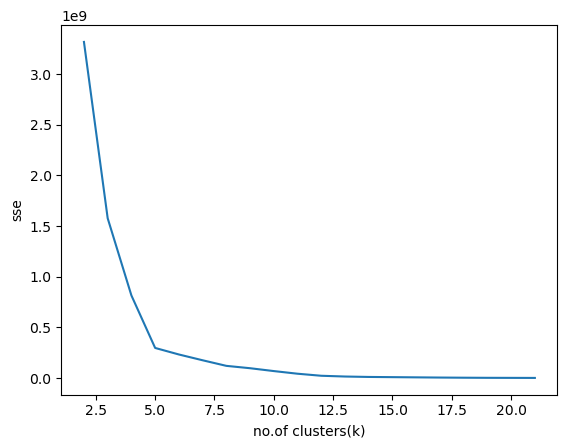

In [15]:
plt.xlabel("no.of clusters(k)")
plt.ylabel("sse")
plt.plot(range(2,len(data)),sse)

In [17]:
km=KMeans(n_clusters=3,random_state=12)
prediction=km.fit_predict(data[["Age","Income($)"]])
prediction

C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [19]:
data["clusters"]=prediction
data

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [20]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

Text(0, 0.5, 'income')

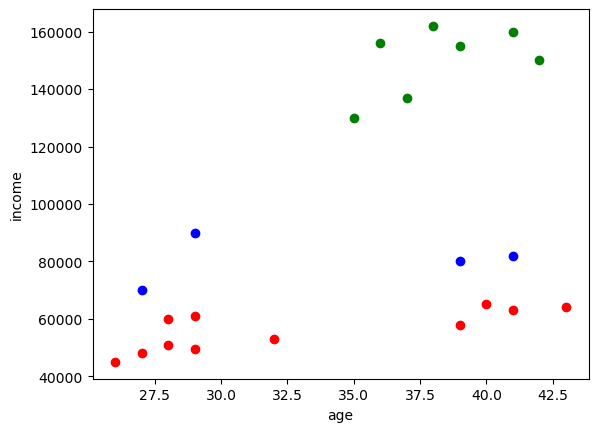

In [21]:
df1=data[data["clusters"]==0]
df2=data[data["clusters"]==1]
df3=data[data["clusters"]==2]
plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")
plt.xlabel("age")
plt.ylabel("income")

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()
data["Income($)"]=scaler.fit_transform(data[["Income($)"]])
data["Age"]=scaler.fit_transform(data[["Age"]])

In [24]:
data

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [26]:
km_new=KMeans(n_clusters=3,random_state=25)
km.fit(data[["Age","Income($)"]])
prediction2=km_new.fit_predict(data[["Age","Income($)"]])

C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [27]:
data["new_clusters"]=prediction2
data

,Name,Age,Income($),clusters,new_clusters
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


[[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]


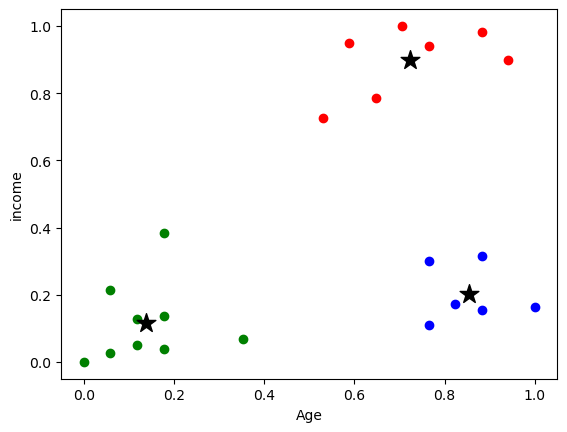

In [28]:
df1=data[data["new_clusters"]==0]
df2=data[data["new_clusters"]==1]
df3=data[data["new_clusters"]==2]
plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")
plt.xlabel("Age")
plt.ylabel("income")
centers=km_new.cluster_centers_
print(centers)
plt.scatter(centers[:,0],centers[:,1],marker="*",s=200,c="black")

In [33]:
km.predict([[41,63000]])

C:\Users\apasi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

### program2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
data1=pd.read_csv("Mall_Customers.csv")
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data1.shape

(200, 5)

In [7]:
data1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data1['Gender']=data1['Gender'].map({'Male':1,'Female':0})

Text(0, 0.5, 'annual income')

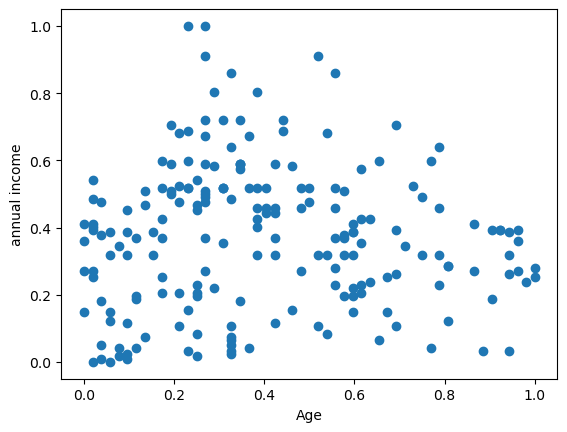

In [39]:
plt.scatter(data1['Age'],data1['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("annual income")

In [18]:
sse=[]
for k in range(2,len(data1)):
    km1=KMeans(n_clusters=k)
    km1.fit(data1[['Age','Annual Income (k$)']])
    sse.append(km1.inertia_)

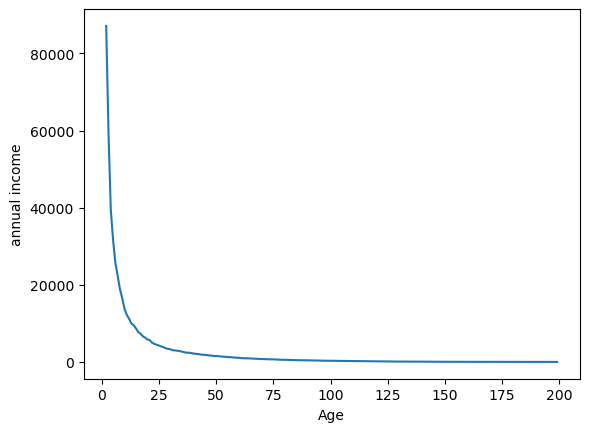

In [19]:
plt.xlabel("Age")
plt.ylabel("annual income")
plt.plot(range(2,len(data1)),sse)

In [21]:
km1=KMeans(n_clusters=3,random_state=12)
predictions=km1.fit_predict(data1[["Age","Annual Income (k$)"]])
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
data1['clusters']=predictions
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,0
197,198,1,32,126,74,0
198,199,1,32,137,18,0


Text(0, 0.5, 'Annual income')

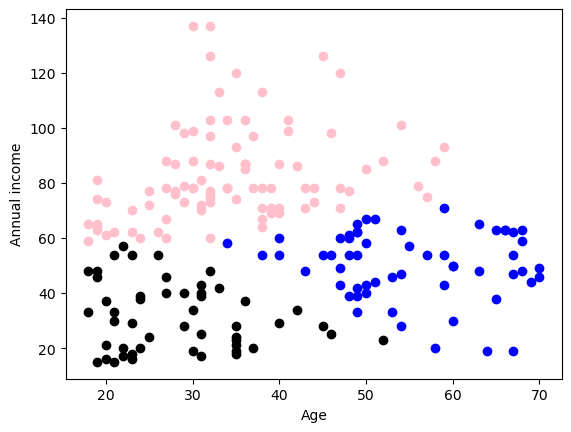

In [24]:
dfa=data1[data1["clusters"]==0]
dfb=data1[data1["clusters"]==1]
dfc=data1[data1["clusters"]==2]
plt.scatter(dfa["Age"],dfa["Annual Income (k$)"],color="pink")
plt.scatter(dfb["Age"],dfb["Annual Income (k$)"],color="black")
plt.scatter(dfc["Age"],dfc["Annual Income (k$)"],color="blue")
plt.xlabel("Age")
plt.ylabel("Annual income")

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
data1["Age"]=scaler.fit_transform(data1[["Age"]])
data1["Annual Income (k$)"]=scaler.fit_transform(data1[["Annual Income (k$)"]])
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,0.019231,0.000000,39,1
1,2,1,0.057692,0.000000,81,1
2,3,0,0.038462,0.008197,6,1
3,4,0,0.096154,0.008197,77,1
4,5,0,0.250000,0.016393,40,1
...,...,...,...,...,...,...
195,196,0,0.326923,0.860656,79,0
196,197,0,0.519231,0.909836,28,0
197,198,1,0.269231,0.909836,74,0
198,199,1,0.269231,1.000000,18,0


In [31]:
km2=KMeans(n_clusters=3,random_state=25)
km2.fit(data1[["Age","Annual Income (k$)"]])
predictions2=km2.fit_predict(data1[["Age","Annual Income (k$)"]])
predictions2

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [33]:
data1["newest_clusters"]=predictions2
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,newest_clusters
0,1,1,0.019231,0.000000,39,1,0
1,2,1,0.057692,0.000000,81,1,0
2,3,0,0.038462,0.008197,6,1,0
3,4,0,0.096154,0.008197,77,1,0
4,5,0,0.250000,0.016393,40,1,0
...,...,...,...,...,...,...,...
195,196,0,0.326923,0.860656,79,0,1
196,197,0,0.519231,0.909836,28,0,1
197,198,1,0.269231,0.909836,74,0,1
198,199,1,0.269231,1.000000,18,0,1


[[0.15264423 0.21016906]
 [0.33653846 0.58435792]
 [0.72175481 0.29943648]]


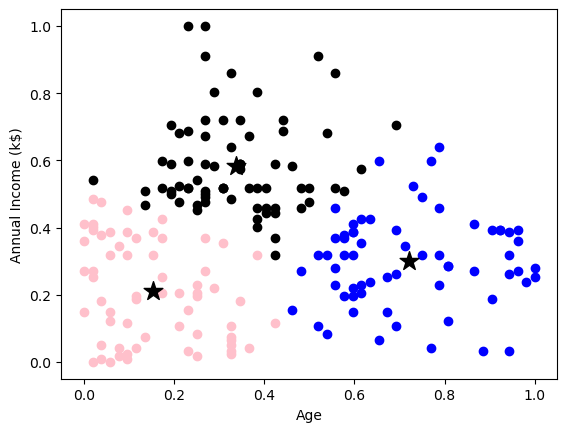

In [38]:
dfa=data1[data1["newest_clusters"]==0]
dfb=data1[data1["newest_clusters"]==1]
dfc=data1[data1["newest_clusters"]==2]
plt.scatter(dfa["Age"],dfa["Annual Income (k$)"],color="pink")
plt.scatter(dfb["Age"],dfb["Annual Income (k$)"],color="black")
plt.scatter(dfc["Age"],dfc["Annual Income (k$)"],color="blue")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
centers=km2.cluster_centers_
print(centers)
plt.scatter(centers[:,0],centers[:,1],marker="*",s=200,c="black")

In [36]:
km1.predict([[30,80]])

array([0])

In [37]:
km2.predict([[30,80]])

array([1])